In [66]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import time
import nltk
from nltk import word_tokenize
from tqdm import tqdm
from tqdm.notebook import tqdm
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
 
tqdm.pandas()

import warnings as wrn
wrn.filterwarnings('ignore')

nltk.download('stopwords')

import os
import matplotlib.font_manager

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mcn8851/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
# Function to get number of tokens
def get_num_tokens(text):
    tokens = nltk.word_tokenize(text)
    return len(tokens)

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Function to postprocess text
def postprocess_tokens(tokens, stop_words):
    # Remove stop words
    tokens_without_stopwords = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

    # Combine tokens back into text
    processed_text = " ".join(tokens_without_stopwords)
    
    return processed_text
    

# Function to generate wordcloud
def generate_wordcloud(text):
    stop_words = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stop_words, width=800, height=400, background_color='white', prefer_horizontal=1, min_font_size=8, contour_width=1, contour_color='steelblue').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [37]:
train = pd.read_csv('/vast/mcn8851/sc-train.csv')
val = pd.read_csv('/vast/mcn8851/sc-val.csv')
test = pd.read_csv('/vast/mcn8851/sc-test.csv')


full_df = pd.concat([train, val, test], ignore_index=True)
summarized_df = pd.read_csv('summarized-opinions-data-sc.csv')

In [38]:
full_df['num_tokens'] = full_df['decision_text'].apply(get_num_tokens)
summarized_df['num_tokens'] = summarized_df['decision_text'].apply(get_num_tokens)

In [39]:
full_df['num_tokens'].describe()

count     26425.000000
mean       5103.298467
std        5666.434580
min           3.000000
25%        1376.000000
50%        3541.000000
75%        6897.000000
max      103443.000000
Name: num_tokens, dtype: float64

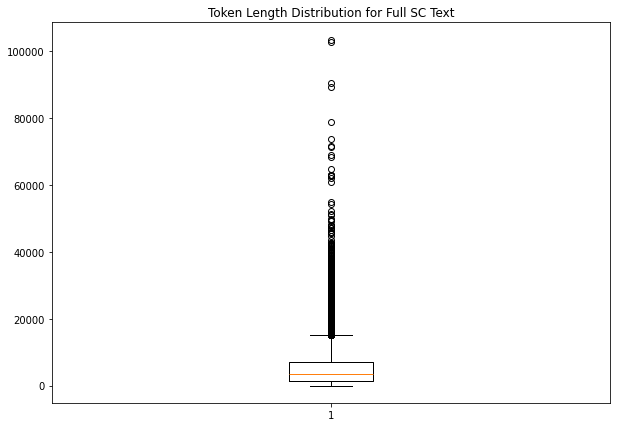

In [40]:
fig = plt.figure(figsize =(10, 7))

plt.title('Token Length Distribution for Full SC Text')
# Creating plot
plt.boxplot(full_df['num_tokens'])
 
# show plot
plt.show()

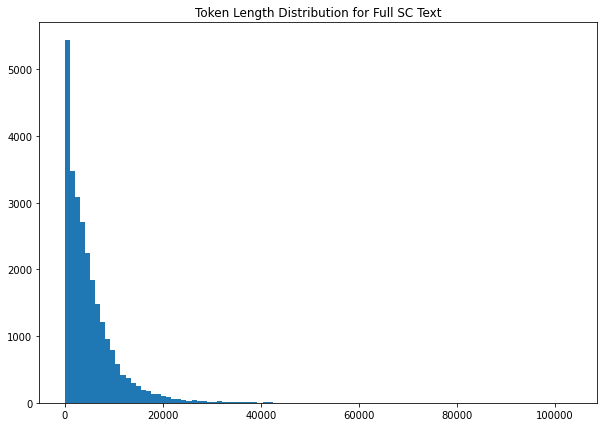

In [45]:
fig = plt.figure(figsize =(10, 7))

plt.title('Token Length Distribution for Full SC Text')
# Creating plot
plt.hist(full_df['num_tokens'], bins=100)
 
# show plot
plt.show()

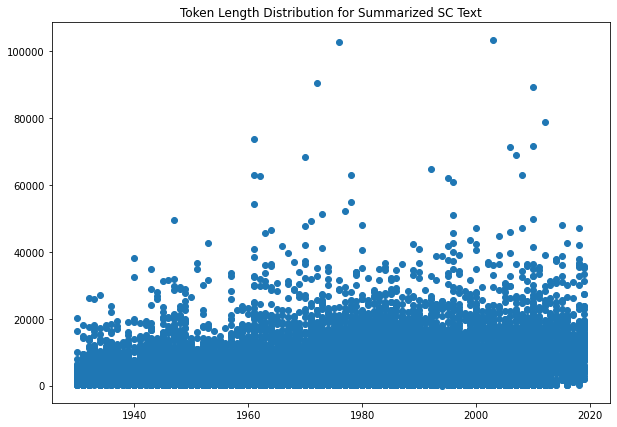

In [53]:
fig = plt.figure(figsize =(10, 7))

plt.title('Token Length Distribution for Summarized SC Text')
# Creating plot
plt.plot(pd.to_datetime(full_df['date_filed']).dt.year,full_df['num_tokens'],'o')
 
# show plot
plt.show()

In [55]:
summarized_df['num_tokens'].describe()

count    26425.000000
mean       186.022819
std        162.439381
min          3.000000
25%        102.000000
50%        147.000000
75%        228.000000
max       4703.000000
Name: num_tokens, dtype: float64

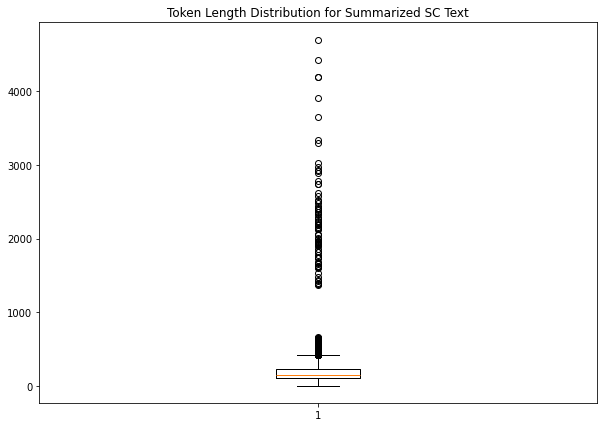

In [56]:
fig = plt.figure(figsize =(10, 7))

plt.title('Token Length Distribution for Summarized SC Text')
# Creating plot
plt.boxplot(summarized_df['num_tokens'])
 
# show plot
plt.show()

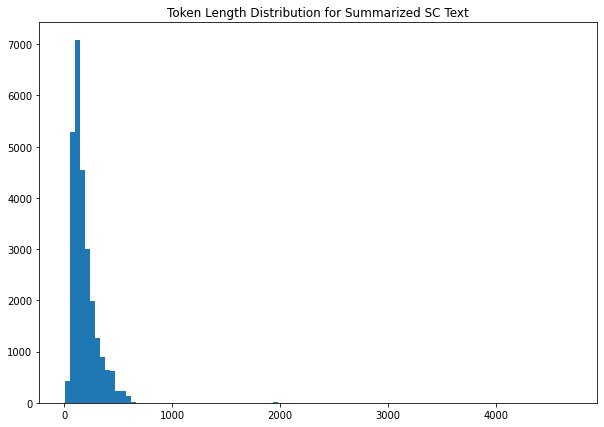

In [115]:
fig = plt.figure(figsize =(10, 7))

plt.title('Token Length Distribution for Summarized SC Text')
# Creating plot
plt.hist(summarized_df['num_tokens'], bins=100)
 
# show plot
plt.show()

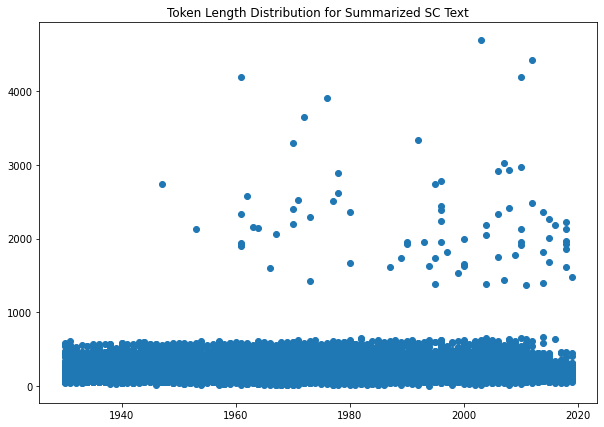

In [58]:
fig = plt.figure(figsize =(10, 7))

plt.title('Token Length Distribution for Summarized SC Text')
# Creating plot
plt.plot(pd.to_datetime(summarized_df['date_filed']).dt.year,summarized_df['num_tokens'],'o')
 
# show plot
plt.show()

In [60]:
summarized_df['scdb_decision_direction'].value_counts()

1.0    15424
2.0    11001
Name: scdb_decision_direction, dtype: int64

In [62]:
summarized_df['Preprocessed_Text'] = summarized_df['decision_text'].apply(preprocess_text)

In [ ]:
liberal_text = ' '.join(summarized_df[summarized_df['scdb_decision_direction'] == 1.0]['Preprocessed_Text']) # liberal
conservative_text = ' '.join(summarized_df[summarized_df['scdb_decision_direction'] == 2.0]['Preprocessed_Text']) # conservative

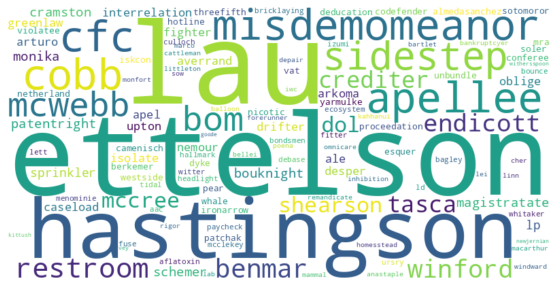

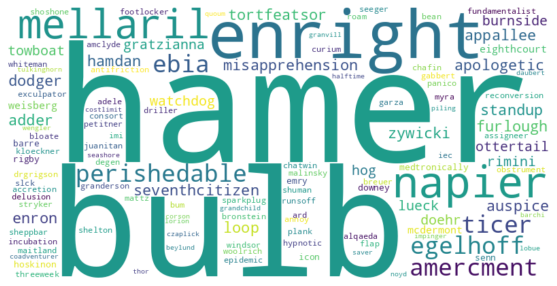

In [116]:
# Tokenize the text
liberal_tokens = word_tokenize(liberal_text)
conservative_tokens = word_tokenize(conservative_text)

# Count the occurrences of each word
liberal_word_counts = Counter(liberal_tokens)
conservative_word_counts = Counter(conservative_tokens)

# Combine the counts for both types of text
combined_word_counts = liberal_word_counts + conservative_word_counts

# Get the most common words
most_common_words = combined_word_counts.most_common()

# Define a threshold for including common words as stop words
threshold = 100  # You can adjust this value based on your data and needs

# Identify the most common words to include in stop words
common_words_to_include = [word for word, count in most_common_words if count >= threshold]

# Find overlapping words
overlapping_words = set(liberal_tokens).intersection(set(conservative_tokens))

# Update the stop words list with both common words and overlapping words
stop_words = set(stopwords.words("english"))
stop_words.update(common_words_to_include)
stop_words.update(overlapping_words)

# Remove duplicates
unique_liberal_tokens = list(set(liberal_tokens))
unique_conservative_tokens = list(set(conservative_tokens))

# Postprocess tokens and generate word clouds
liberal_cloud = postprocess_tokens(unique_liberal_tokens, stop_words)
conservative_cloud = postprocess_tokens(unique_conservative_tokens, stop_words)

generate_wordcloud(liberal_cloud)
generate_wordcloud(conservative_cloud)